In [272]:
using HDF5
using ITensors
using Plots
using StatsBase
include("../sampling.jl");

In [273]:
function loadMPS(path::String; id::String="W")
    """Loads an MPS from a .h5 file. Returns and ITensor MPS."""
        file = path[end-2:end] != ".h5" ? path * ".h5" : path
        f = h5open("$file","r")
        mps = read(f, "$id", MPS)
        close(f)
        return mps
end

loadMPS (generic function with 1 method)

In [306]:
mps = loadMPS("/Users/joshua/Documents/QuantumInspiredML/LogLossAlternative/notebooks/iris2.h5")

MPS
[1] ((dim=2|id=172|"S=1/2,Site,n=1"), (dim=2|id=626|"Link,l=1"))
[2] ((dim=2|id=284|"S=1/2,Site,n=2"), (dim=4|id=833|"Link,l=2"), (dim=2|id=626|"Link,l=1"))
[3] ((dim=2|id=918|"S=1/2,Site,n=3"), (dim=6|id=438|"Link,l=3"), (dim=4|id=833|"Link,l=2"))
[4] ((dim=3|id=902|"f(x)"), (dim=2|id=146|"S=1/2,Site,n=4"), (dim=6|id=438|"Link,l=3"))


In [307]:
norm(mps)

0.9999999999999994

In [308]:
function sliceMPS(W::MPS, class_label::Int)
    """General function to slice the MPS and return the state corresponding to a specific class label."""
    ψ = deepcopy(W)
    decision_idx = findindex(ψ[4], "f(x)")
    decision_state = onehot(decision_idx => (class_label + 1))
    ψ[4] *= decision_state
    normalize!(ψ) # same step as before - normalise the tensor at the site with the label index instead?

    return ψ
end

sliceMPS (generic function with 1 method)

In [309]:
state0 = sliceMPS(mps, 0)
state1 = sliceMPS(mps, 1)
state2 = sliceMPS(mps, 2)

MPS
[1] ((dim=2|id=172|"S=1/2,Site,n=1"), (dim=2|id=626|"Link,l=1"))
[2] ((dim=2|id=284|"S=1/2,Site,n=2"), (dim=4|id=833|"Link,l=2"), (dim=2|id=626|"Link,l=1"))
[3] ((dim=2|id=918|"S=1/2,Site,n=3"), (dim=6|id=438|"Link,l=3"), (dim=4|id=833|"Link,l=2"))
[4] ((dim=2|id=146|"S=1/2,Site,n=4"), (dim=6|id=438|"Link,l=3"))


In [310]:
sample_mps_with_contractions(state0)

4-element Vector{Float64}:
 0.64104986210017
 0.7222036639694187
 0.2845471125698428
 0.25184727245085636

In [316]:
samps_c1 = Matrix{Float64}(undef, 500, 4)
for i in 1:500
    samps_c1[i, :] = sample_mps_with_contractions(state0)
end
samps_c2 = Matrix{Float64}(undef, 500, 4)
for i in 1:500
    samps_c2[i, :] = sample_mps_with_contractions(state1)
end
samps_c3 = Matrix{Float64}(undef, 500, 4)
for i in 1:500
    samps_c3[i, :] = sample_mps_with_contractions(state2)
end

In [312]:
samps_c1 = Matrix{Float64}(undef, 50, 4)
for i in 1:50
    samps_c1_temp = Matrix{Float64}(undef, 100, 4)
    for j in 1:100
        samps_c1_temp[j, :] = sample_mps_with_contractions(state0)
    end
    samps_c1[i, :] = mean(samps_c1_temp, dims=1)
end
samps_c2 = Matrix{Float64}(undef, 50, 4)
for i in 1:50
    samps_c2_temp = Matrix{Float64}(undef, 100, 4)
    for j in 1:100
        samps_c2_temp[j, :] = sample_mps_with_contractions(state1)
    end
    samps_c2[i, :] = mean(samps_c2_temp, dims=1)
end
samps_c3 = Matrix{Float64}(undef, 50, 4)
for i in 1:50
    samps_c3_temp = Matrix{Float64}(undef, 100, 4)
    for j in 1:100
        samps_c3_temp[j, :] = sample_mps_with_contractions(state2)
    end
    samps_c3[i, :] = mean(samps_c3_temp, dims=1)
end

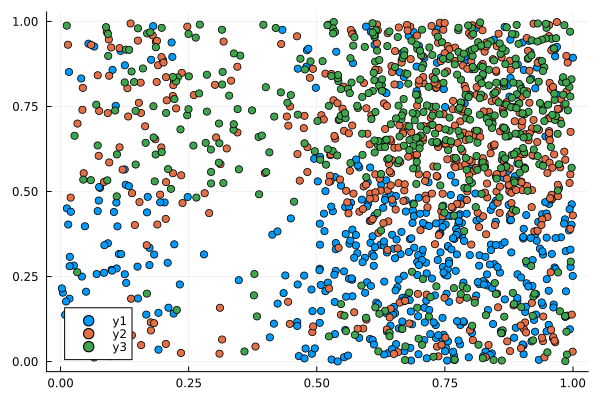

In [317]:
scatter(samps_c1[:,1], samps_c1[:, 3])
scatter!(samps_c2[:,1], samps_c2[:, 3])
scatter!(samps_c3[:,1], samps_c3[:, 3])